In [1]:
'''importing packages and modules and reading data'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")


#Load dataset into a pandas dataFrame.
cancer = pd.read_csv("haberman.csv")

In [2]:
'''how many data points have in dataset'''
print(cancer.shape)

(305, 4)


In [3]:
'''What are the column names in our dataset?'''
print (cancer.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [4]:
'''creating the header names'''
'''https://www.kaggle.com/premvardhan/exploratory-data-analysis-haberman-s-survival'''
'''https://medium.com/@gokulkarthikk/habermans-cancer-survival-visual-exploratory-data-analysis-using-python-e7dcb7ac01ed'''
#header=header.rename(column={"30":['age'], "64":['treat_year'], "1":['lymph_nodes'], "1.1":['survival_status']})
cancer.columns = ["age", "operation_year", "lymph_node", "survival_status"]
cancer.head()
cancer['survival_status'] = cancer['survival_status'].map({1:"yes", 2:"no"})
cancer['survival_status'] = cancer['survival_status'].astype('category')
print(cancer.head())

   age  operation_year  lymph_node survival_status
0   30              62           3             yes
1   30              65           0             yes
2   31              59           2             yes
3   31              65           4             yes
4   33              58          10             yes


In [5]:
cancer["survival_status"].value_counts()
#cancer is a imbalanced dataset as the number of data points for every class is not equal


yes    224
no      81
Name: survival_status, dtype: int64

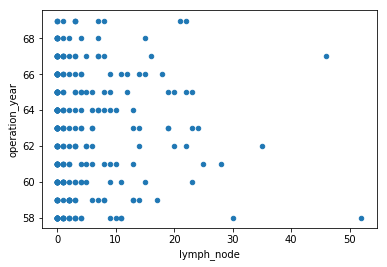

'Observation:\nHard to draw any from this 2D scatter plot, points are lying all over the place'

In [6]:
#2D scatter plot
cancer.plot(kind='scatter', x='lymph_node', y='operation_year') ;
plt.show()

'''Observation:
Hard to draw any from this 2D scatter plot, points are lying all over the place'''

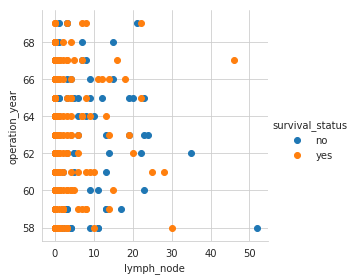

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(cancer, hue="survival_status", size=4) \
   .map(plt.scatter, "lymph_node", "operation_year") \
   .add_legend();
plt.show();
#hard to understand any observation from this 2D scatter plot also 

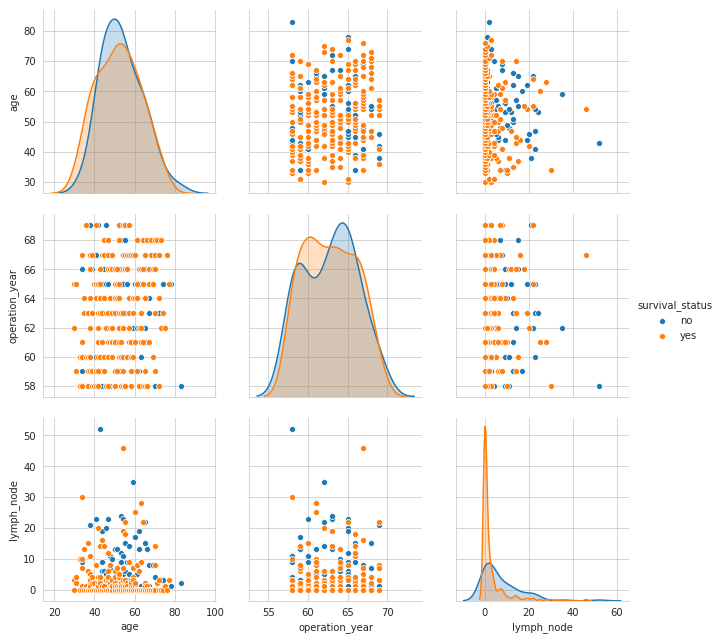

"Observation:\nFrom the pair plot we can see in the age vs. lymph_node there is a separation between the patients who survived and who did not.\nthough it's not clear but we can see patients who survived their positive axillary lymph nodes is lesser than who did not"

In [8]:
#pair plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer, hue="survival_status", vars=["age", "operation_year", "lymph_node"], size=3);
plt.show()
'''Observation:
From the pair plot we can see in the age vs. lymph_node there is a separation between the patients who survived and who did not.
though it's not clear but we can see patients who survived their positive axillary lymph nodes is lesser than who did not'''

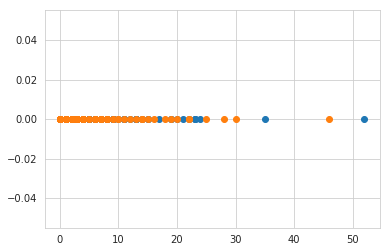

'We can see lymph nodes are less for patients who survived. But still lots of points are overlapping '

In [9]:
#1-D scatter plot using lymph_node
cancer_no= cancer.loc[cancer["survival_status"] == "no"];
cancer_yes = cancer.loc[cancer["survival_status"] == "yes"];
plt.plot(cancer_no["lymph_node"], np.zeros_like(cancer_no['lymph_node']), 'o')
plt.plot(cancer_yes["lymph_node"], np.zeros_like(cancer_yes['lymph_node']), 'o')

plt.show()
'''We can see lymph nodes are less for patients who survived. But still lots of points are overlapping '''

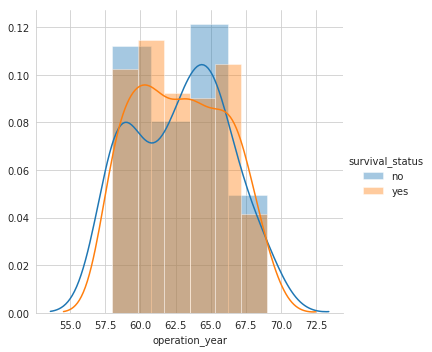

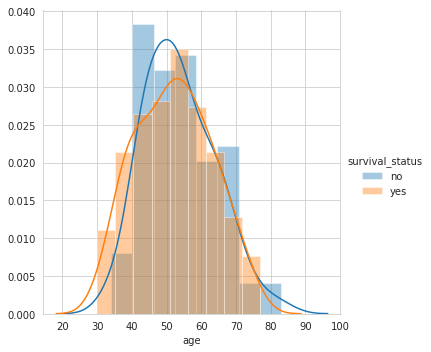

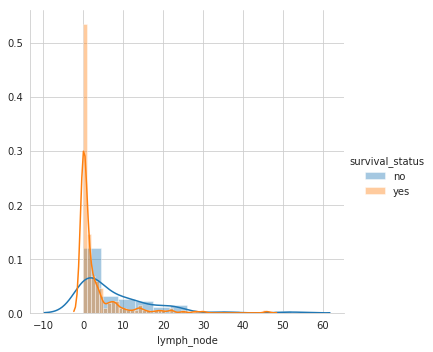

In [10]:
#HISTOGRAM
#PDF

sns.FacetGrid(cancer, hue="survival_status", size=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.show()

sns.FacetGrid(cancer, hue="survival_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show()

sns.FacetGrid(cancer, hue="survival_status", size=5) \
   .map(sns.distplot, "lymph_node") \
   .add_legend();
plt.show();


[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


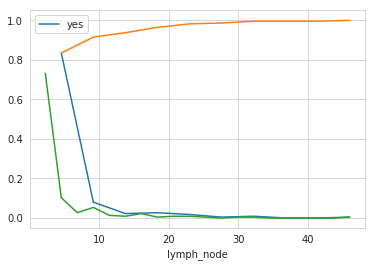

In [11]:
#CDF and PDF
counts, bin_edges = np.histogram(cancer_yes['lymph_node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(cancer_yes['lymph_node'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.xlabel("lymph_node")
plt.legend(["yes"])

plt.show();


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


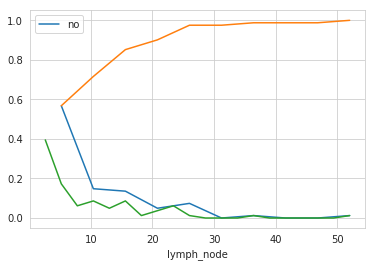

In [12]:
counts, bin_edges = np.histogram(cancer_no['lymph_node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(cancer_no['lymph_node'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.xlabel("lymph_node")
plt.legend([ "no"])


plt.show();

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


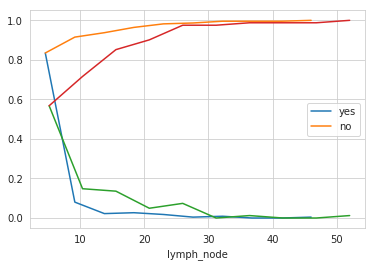

In [13]:
#various CDF in a single plot
counts, bin_edges = np.histogram(cancer_yes['lymph_node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)




counts, bin_edges = np.histogram(cancer_no['lymph_node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


plt.xlabel("lymph_node")
plt.legend(["yes", "no"])

plt.show()

In [14]:
#Mean, Variance, Std-deviation, Median, IQR, MAD  
import numpy as np

print("Means:")
print(np.mean(cancer_yes["lymph_node"]))
print(np.mean(cancer_no["lymph_node"]))


print("\nStd-dev:")
print(np.std(cancer_yes["lymph_node"]))
print(np.std(cancer_no["lymph_node"]))

print("\nMedians:")
print(np.median(cancer_yes["lymph_node"]))
print(np.median(cancer_no["lymph_node"]))



print("\nQuantiles:")
print(np.percentile(cancer_yes["lymph_node"],np.arange(0, 100, 25)))
print(np.percentile(cancer_no["lymph_node"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(cancer_yes["lymph_node"],90))
print(np.percentile(cancer_yes["lymph_node"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(cancer_yes["lymph_node"]))
print(robust.mad(cancer_no["lymph_node"]))


Means:
2.799107142857143
7.45679012345679

Std-dev:
5.869092706952764
9.128776076761635

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
8.0

Median Absolute Deviation
0.0
5.930408874022408


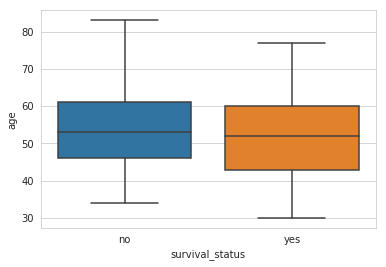

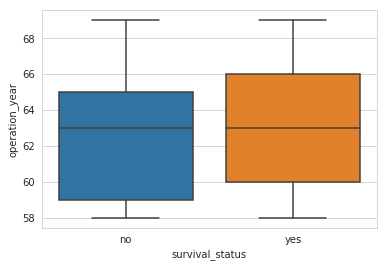

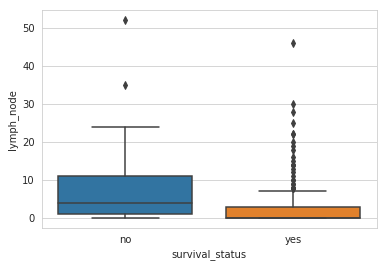

In [15]:
#Box-plot with whiskers:
sns.boxplot(x='survival_status',y='age', data=cancer)
plt.show() 

sns.boxplot(x='survival_status',y='operation_year', data=cancer)
plt.show()

sns.boxplot(x='survival_status',y='lymph_node', data=cancer)
plt.show() 


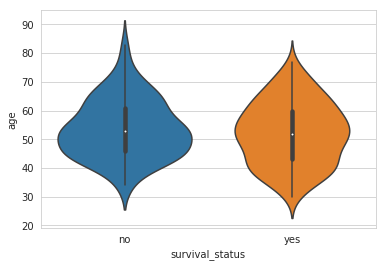

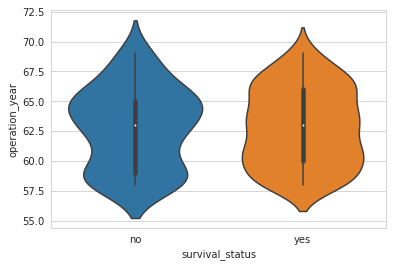

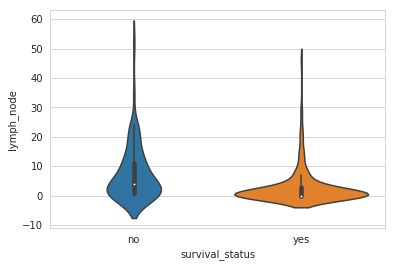

In [16]:
#violin plot

sns.violinplot(x="survival_status", y="age", data=cancer, size=8)
plt.show()

sns.violinplot(x="survival_status", y="operation_year", data=cancer, size=8)
plt.show()

sns.violinplot(x="survival_status", y="lymph_node", data=cancer, size=8)
plt.show()
